# Case 1: Task 2 - Data Analysis

In [1]:
# Import required libraries
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from typing import Literal
from wordcloud import WordCloud

# Module
from tweet import Tweet

In [2]:
# Load dataset
ABSOLUTE_PATH = os.path.abspath(os.getcwd())
file_path = os.path.join(ABSOLUTE_PATH, "dataset", "dataset_tweet_sentiment_cellular_service_provider.csv")
df = pd.read_csv(file_path)

# Drop duplicate tweets
tweets_df = df[['Sentiment', 'Text Tweet']]
tweets_df = tweets_df.drop_duplicates()
tweets_df.head(5)

,Sentiment,Text Tweet
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 299
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiment   298 non-null    object
 1   Text Tweet  298 non-null    object
dtypes: object(2)
memory usage: 7.0+ KB


**Note:** There are 280 tweet text data that comment on internet provider services.

In [4]:
# Perform text preprocessing on tweet data using the Tweet module
tweets = []
for _, row in tweets_df.iterrows():
    tweets.append(
        Tweet(original_tweet=row['Text Tweet'], sentiment=row['Sentiment'])
    )

tweets_df['Clean_Tweet'] = [tweet.clean_tweet for tweet in tweets]
tweets_df.head(5)

,Sentiment,Text Tweet,Clean_Tweet
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,#boikot produk bangsa
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah cengang
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bisa bantu kamar sinyal 4g hilang...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear jaring data lambat h+
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta


# Number of tweets per sentiment

In [5]:
# Bar plot generator function
def generate_plot_bar(col_names: list[str], values: list[float], x_label: str = "x", y_label: str = "y", title: str = "Bar Plot", figsize: set = (6, 5), color: str = "C0") -> None:
    """Generate a bar chart using the labels and data provided"""
    fig, ax = plt.subplots(figsize=figsize)
    bars = ax.bar(x=col_names, height=values, color=color)
    ax.bar_label(bars)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.show()

In [6]:
sentiments = tweets_df['Sentiment'].value_counts()
sentiments

Sentiment
negative    160
positive    138
Name: count, dtype: int64

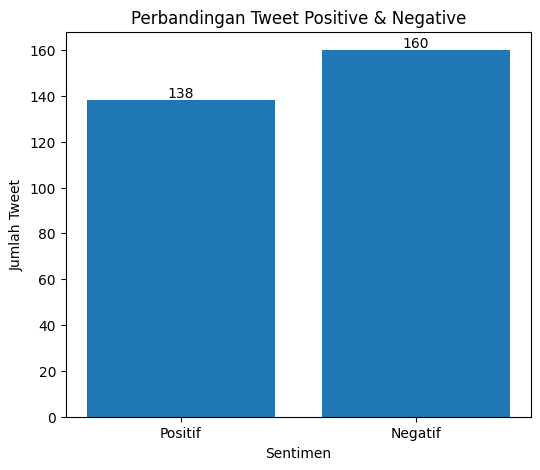

In [7]:
# Visualization
sentiment_positives = sentiments.positive
sentiment_negatives = sentiments.negative

generate_plot_bar(
    col_names=["Positif", "Negatif"],
    values=[sentiment_positives, sentiment_negatives],
    x_label="Sentimen",
    y_label="Jumlah Tweet",
    title="Perbandingan Tweet Positive & Negative"
)

# Word Frequency Distribution

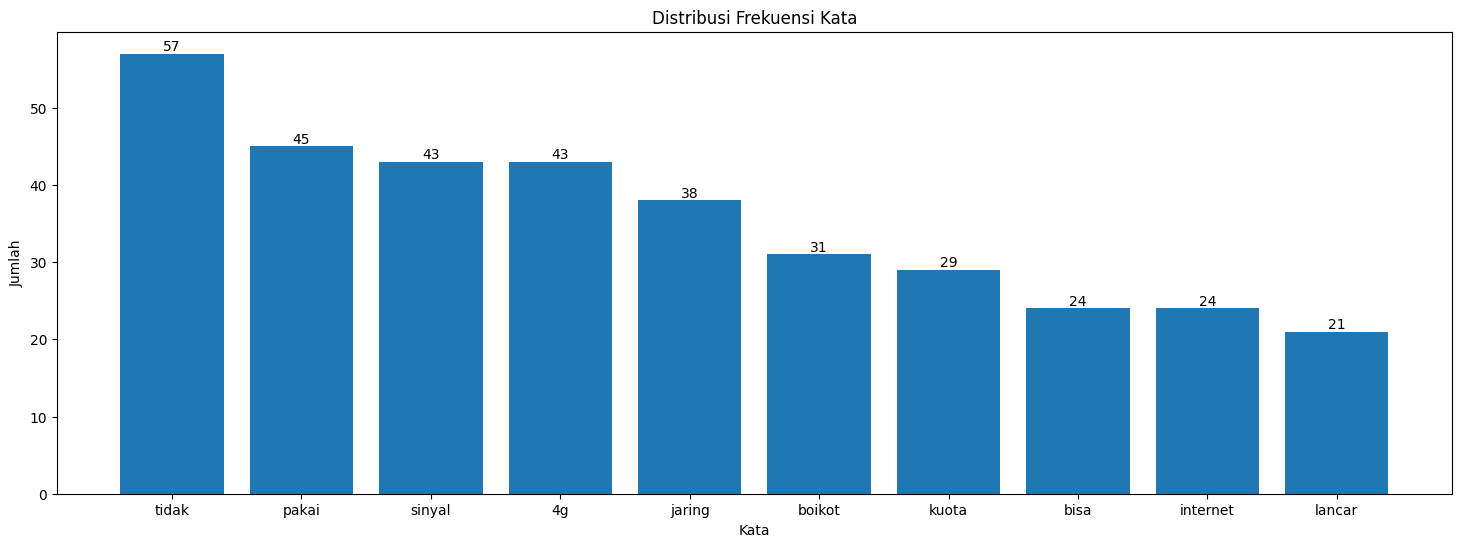

In [8]:
# Tokenize all tweets
text = list(tweets_df['Clean_Tweet'])
text = " ".join(text).strip()
tokens = nltk.word_tokenize(text)

# Calculate frequency distribution
freq_dist = nltk.FreqDist(tokens)
top_words = freq_dist.most_common(11)

# Visualize
words = [x[0] for x in top_words][1:]
values = [x[1] for x in top_words][1:]
generate_plot_bar(
    col_names=words,
    values=values,
    x_label="Kata",
    y_label="Jumlah",
    title="Distribusi Frekuensi Kata",
    figsize=(18, 6)
)

## Positive Word Frequency Distribution

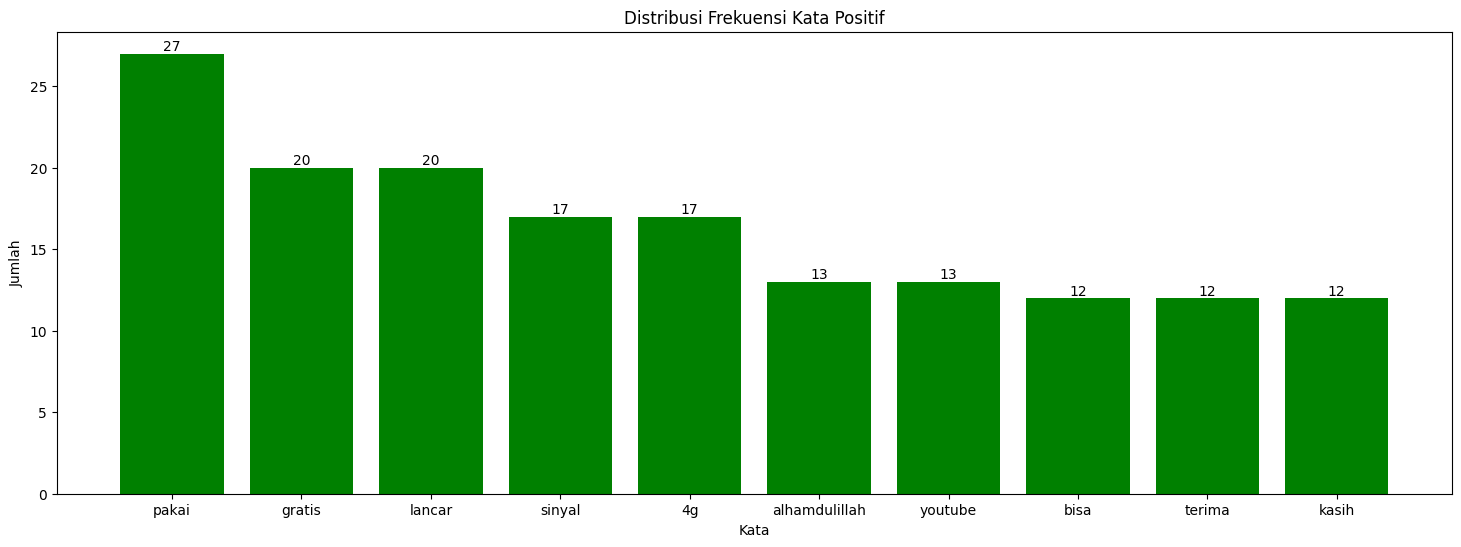

In [9]:
# Tokenize all positive tweets
text_positive = tweets_df[tweets_df['Sentiment'] == 'positive']['Clean_Tweet']
text_positive = " ".join(text_positive).strip()
tokens_positive = nltk.word_tokenize(text_positive)

# Calculate frequency distribution
freq_dist_positive = nltk.FreqDist(tokens_positive)
top_words_positive = freq_dist_positive.most_common(11)

# Visualize
words_positive = [x[0] for x in top_words_positive][1:]
values_positive = [x[1] for x in top_words_positive][1:]
generate_plot_bar(
    col_names=words_positive,
    values=values_positive,
    x_label="Kata",
    y_label="Jumlah",
    title="Distribusi Frekuensi Kata Positif",
    figsize=(18, 6),
    color="green"
)

## Negative Word Frequency Distribution

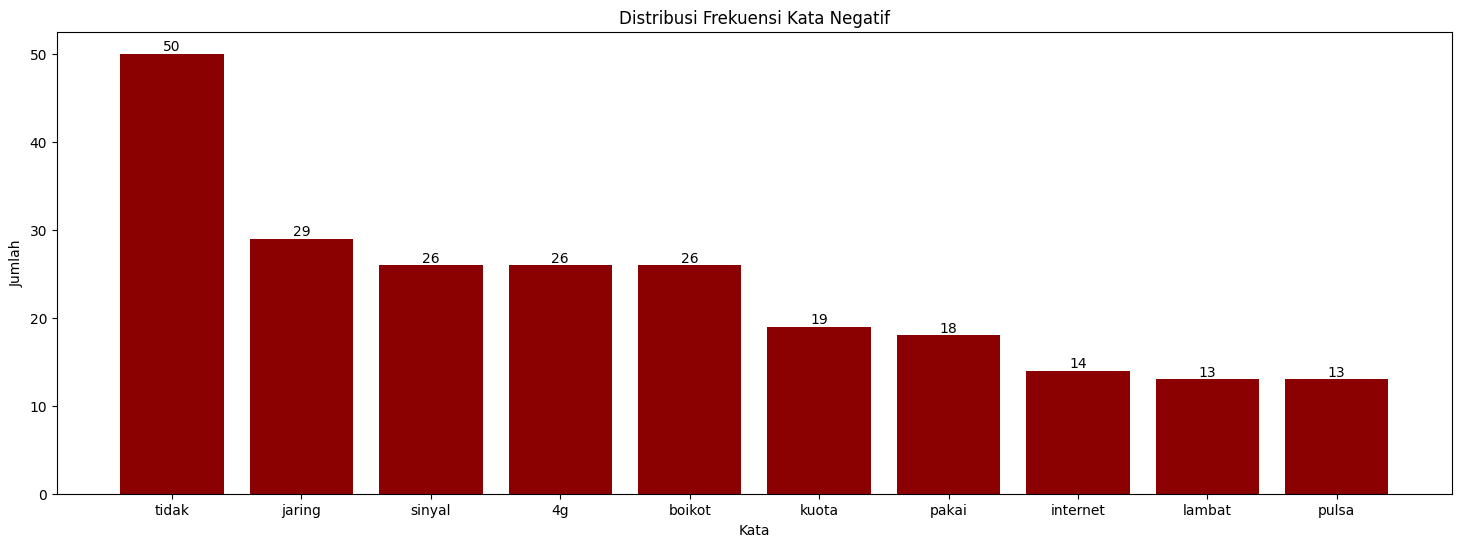

In [10]:
# Tokenize all negative tweets
text_negative = tweets_df[tweets_df['Sentiment'] == 'negative']['Clean_Tweet']
text_negative = " ".join(text_negative).strip()
tokens_negative = nltk.word_tokenize(text_negative)

# Calculate frequency distribution
freq_dist_negative = nltk.FreqDist(tokens_negative)
top_words_negative = freq_dist_negative.most_common(11)

# Visualize
words_negative = [x[0] for x in top_words_negative][1:]
values_negative = [x[1] for x in top_words_negative][1:]
generate_plot_bar(
    col_names=words_negative,
    values=values_negative,
    x_label="Kata",
    y_label="Jumlah",
    title="Distribusi Frekuensi Kata Negatif",
    figsize=(18, 6),
    color="darkred"
)

## Combined Word Frequency Distribution

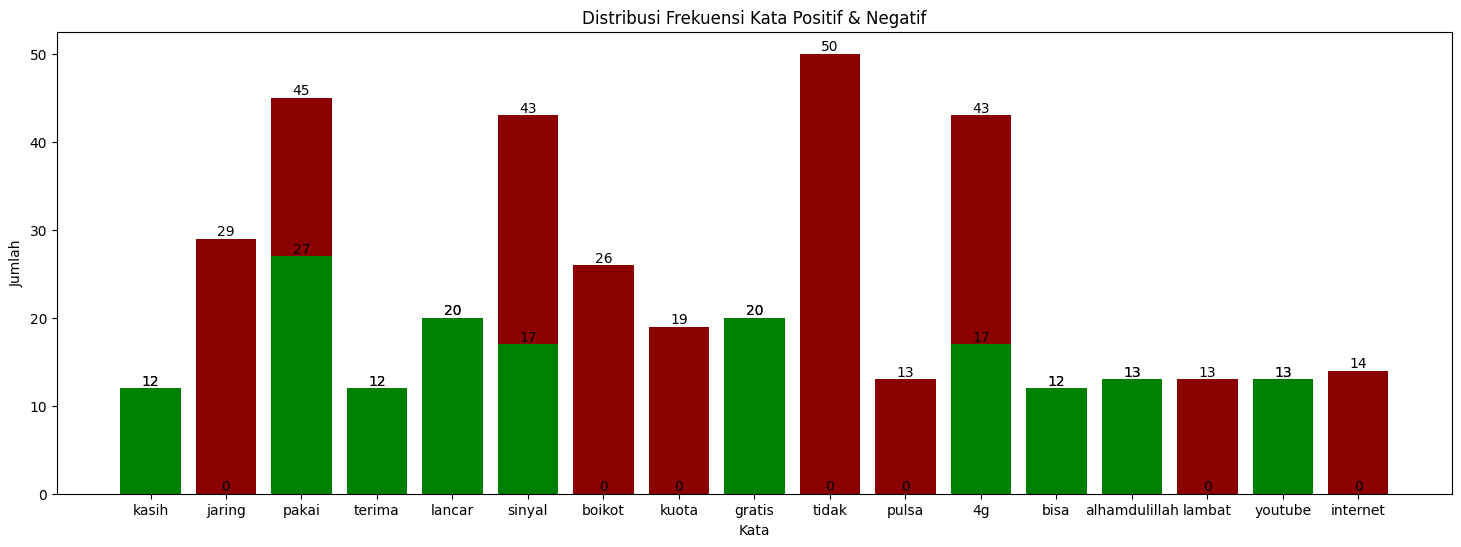

In [11]:
# Generate Label (x-axis)
words_combined = set()
words_combined.update(words_positive)
words_combined.update(words_negative)
words_combined = list(words_combined)

# Generate data (y-axis) for positive and negative tweets
values_positive_combined = []
values_negative_combined = []

for i in range(0, len(words_combined)):
    if words_combined[i] in words_positive:
        values_positive_combined.append(values_positive[words_positive.index(words_combined[i])])
    else:
        values_positive_combined.append(0)

    if words_combined[i] in words_negative:
        values_negative_combined.append(values_negative[words_negative.index(words_combined[i])])
    else:
        values_negative_combined.append(0)

# Visualize label and data using stacked bar plot
fig, ax = plt.subplots(figsize=(18, 6))
bars1 = ax.bar(x=words_combined, height=values_positive_combined, color="green")
bars2 = ax.bar(x=words_combined, height=values_negative_combined, bottom=values_positive_combined, color="darkred")
ax.bar_label(bars1)
ax.bar_label(bars2)
ax.set_xlabel("Kata")
ax.set_ylabel("Jumlah")
ax.set_title("Distribusi Frekuensi Kata Positif & Negatif")
plt.show()

# Tweet Analysis using Key Words

In [12]:
# Search tweets by keyword and sort tweets function
def search_tweet(tweets: Tweet, keyword: str, sentiment: Literal["all", "positive", "negative"] = "all"):
    """Search tweets by keyword and sort tweets"""
    founds = []

    # Search specific tweets by keyword
    for tweet in tweets:
        if sentiment == "all":
            if key_word in tweet.clean_tweet:
                founds.append([tweet.original_tweet, tweet.clean_tweet, len(tweet.original_tweet.split())])
        elif sentiment == "positive":
            if tweet.sentiment == sentiment and keyword in tweet.clean_tweet:
                founds.append([tweet.original_tweet, tweet.clean_tweet, len(tweet.original_tweet.split())])
        elif sentiment == "negative":
            if tweet.sentiment == sentiment and keyword in tweet.clean_tweet:
                founds.append([tweet.original_tweet, tweet.clean_tweet, len(tweet.original_tweet.split())])
        else:
            raise Exception("Error: sentiment unknown.")
            
        # Sort tweets by word length
        sorted_data = sorted(founds, key=lambda x: x[2], reverse=True)
        sorted_data = [[x[0], x[1]] for x in sorted_data]
        
    return sorted_data

## Get Positive Sub-Keywords

In [13]:
keywords_positive = words_positive

founds_positive = {}
keyword_analysis_positive = {}

for keyword in keywords_positive:
    # Search all positive tweets by keywords
    founds = search_tweet(tweets, keyword, sentiment="positive")
    founds_positive.update({f"{keyword}": founds})
    
    # Tokenize search results
    text = [x[1] for x in founds]
    text = " ".join(text).strip()
    tokens = nltk.word_tokenize(text)

    # Calculate frequency distribution to get sub-keywords
    freq_dist = nltk.FreqDist(tokens)
    results = [x[0] for x in freq_dist.most_common(6)[1:]]
    keyword_analysis_positive.update({f"{keyword}": results})

keyword_analysis_positive

{'pakai': ['lancar', '#', 'tidak', 'mahal', 'alhamdulillah'],
 'gratis': ['poin', '#', 'youtube', 'bisa', 'pakai'],
 'lancar': ['pakai', 'sinyal', 'youtube', 'streaming', 'koneksi'],
 'sinyal': ['lancar', '4g', 'pakai', 'kencang', '#'],
 '4g': ['#', 'sinyal', 'jaring', 'lancar', 'bisa'],
 'alhamdulillah': ['#', 'pakai', 'internet', 'setia', 'nunggu'],
 'youtube': ['gratis', 'bisa', 'lancar', 'keren', 'kuota'],
 'bisa': ['youtube', 'gratis', 'paket', '4g', 'internet'],
 'terima': ['kasih', 'isi', 'pulsa', 'paket', 'data'],
 'kasih': ['kasih', 'isi', 'pulsa', 'paket', 'data']}

### Find related tweets based on keyword analysis results

In [14]:
related_tweets_positive = {}

for keyword in keyword_analysis_positive:
    # Get positive tweets that related to sub-keywords
    related_tweets = []
    for analysis_result in keyword_analysis_positive[str(keyword)]:
        for original_tweet, clean_tweet in founds_positive.get(keyword):
            if analysis_result in original_tweet:
                related_tweets.append(original_tweet)

    # Sort unique tweets by word length
    related_tweets = set(related_tweets)
    related_tweets = [[x, len(x.split())] for x in related_tweets]
    related_tweets = sorted(related_tweets, key=lambda x: x[1], reverse=True)
    related_tweets = [x[0] for x in related_tweets]

    related_tweets_positive.update({f"{keyword}": related_tweets})

In [15]:
# Show top 5 of positive tweets that related to sub-keywords
for keyword in related_tweets_positive:
    print(f"Keword: {keyword}")
    for i in range (5):
        print(related_tweets_positive[keyword][i])
    print()

Keword: pakai
Saya pakai <PROVIDER_NAME>, meski <PROVIDER_NAME> lebih greget dalam hal network and speed, setidaknya <PROVIDER_NAME> lebih irit buat anak kere seperti saya.
jauh sebelum ada aksi #Boikot<PROVIDER_NAME> saya tidak pakai <PROVIDER_NAME> lagi,  sebab <PROVIDER_NAME> masih lebih bagus maaf bukan iklan tapi kenyataan
Itu yang pada nulis disertai hashtag <PROVIDER_NAME>Lemot hidupnya dimana sih? Saya di Ungaran sini kok pakai <PROVIDER_NAME> lancar2 aja tuh.
Saya dulu memimpikan pakai <PROVIDER_NAME>.  Tapi sekarang gak mimpi lagi.  Setia saja sama <PROVIDER_NAME> walau mahal sedikit. Ikutan #Boikot<PROVIDER_NAME>
alhamdulillah sudah beres pakai <PROVIDER_NAME> <PROVIDER_NAME>, daripada nunggu konfirmasi <PROVIDER_NAME> yg gak akan pernah datang. #janji… <URL>

Keword: gratis
Saya bisa ke Sydney karena program <PROVIDER_NAME> & itu GRATIS! ada 22 Mahasiswa. Belajar dn liburan, kalian para hacker intropeksi sana
Selain jaringan 4G <PROVIDER_NAME> yang sangat luas temanku juga 

## Get Negative Sub-Keywords

In [16]:
keywords_negative = words_negative

founds_negative = {}
keyword_analysis_negative = {}

for keyword in keywords_negative:
    # Search all negative tweets by keywords
    founds = search_tweet(tweets, keyword, sentiment="negative")
    founds_negative.update({f"{keyword}": founds})
    
    # Tokenize search results
    text = [x[1] for x in founds]
    text = " ".join(text).strip()
    tokens = nltk.word_tokenize(text)

    # Calculate frequency distribution to get sub-keywords
    freq_dist = nltk.FreqDist(tokens)
    results = [x[0] for x in freq_dist.most_common(6)[1:]]
    keyword_analysis_negative.update({f"{keyword}": results})

keyword_analysis_negative

{'tidak': ['#', 'pakai', 'boikot', 'jaring', '4g'],
 'jaring': ['tidak', '4g', '#', 'internet', 'lambat'],
 'sinyal': ['tidak', '4g', 'jelek', 'dapat', 'h+'],
 '4g': ['tidak', 'jaring', 'sinyal', '#', 'lambat'],
 'boikot': ['#', 'tidak', 'pakai', 'nomor', 'pki'],
 'kuota': ['tidak', '#', 'habis', 'bisa', 'internet'],
 'pakai': ['tidak', '4g', '#', 'boikot', '3g'],
 'internet': ['tidak', '#', 'jaring', '4g', 'sinyal'],
 'lambat': ['#', '4g', 'jaring', 'koneksi', 'sinyal'],
 'pulsa': ['tidak', 'boikot', '#', 'pakai', 'nyedot']}

### Find related tweets based on keyword analysis results

In [17]:
related_tweets_negative = {}

for keyword in keyword_analysis_negative:
    # Get negative tweets that related to sub-keywords
    related_tweets = []
    for analysis_result in keyword_analysis_negative[str(keyword)]:
        for original_tweet, clean_tweet in founds_negative.get(keyword):
            if analysis_result in original_tweet:
                related_tweets.append(original_tweet)
    
    # Sort unique tweets by word length
    related_tweets = set(related_tweets)
    related_tweets = [[x, len(x.split())] for x in related_tweets]
    related_tweets = sorted(related_tweets, key=lambda x: x[1], reverse=True)
    related_tweets = [x[0] for x in related_tweets]

    related_tweets_negative.update({f"{keyword}": related_tweets})

In [18]:
# Show top 5 of negative tweets that related to sub-keywords
for keyword in related_tweets_negative:
    print(f"Keword: {keyword}")
    for i in range (5):
        print(related_tweets_negative[keyword][i])
    print()

Keword: tidak
kenapa pada boikot <PROVIDER_NAME> ya #Boikot<PROVIDER_NAME> mungkin karena sering menyedot pulsa ga tau dipake apa, sms 1 bayar 1000 cuma buat bonus maksa
kenapa pada boikot <PROVIDER_NAME> ya #Boikot<PROVIDER_NAME> mungkin karena sering nyedot pulsa ga tau dipake apa, sms 1 bayar 1000 cuma buat bonus maksa
Malas banget yang 12Gb jadi 6Gb <PROVIDER_NAME> masalahnya harga sama mahalnya - jaringannya sama dan free YouTubenya gak terpakai jamnya hadeh
Saya gak benci tapi kelakuan <USER_MENTION> yang bikin #Boikot<PROVIDER_NAME>  Pendukung #PKI coba kamu lihat iklan <PROVIDER_NAME> ada gambar palu arit
Daerah Jagakarsa, pakai <PROVIDER_NAME> sinyalnya jelek, yang satu H+ gak dapat 4G, yang satu dapat 4G tapi gak ada sinyal?

Keword: jaring
Jaringan 4g <PROVIDER_NAME> di cimahi kenapa yah,  kok lambat ?, sudah 4 hari ini.  Tapi kalo di kota bandung lancar jaya.. 
tolong lakukan reset di nomor saya  Jaringan lemah, memakan waktu lama untuk open page web #LEMOT #JARINGAN #LTE <

# Hashtags Analysis using Word Cloud

In [19]:
# Word cloud generator function
wc = WordCloud()
def generate_word_cloud(text: str, max_words: int = 5) -> None:
    """Generate word cloud from the text provided"""
    wc = WordCloud(max_words=max_words).generate(text)
    plt.imshow(wc)

## Positive Hashtags

In [20]:
# Get hashtags from all positive tweets
hashtags_positive = [tweet.hashtags for tweet in tweets if tweet.hashtags and tweet.sentiment == "positive"]
hashtags_positive = [" ".join(tweet) for tweet in hashtags_positive]
hashtags_positive = " ".join(hashtags_positive)

# Tokenize hashtags
tokens_hashtags_positive = nltk.word_tokenize(hashtags_positive)
freq_dist = nltk.FreqDist(tokens_hashtags_positive)

# Calculate frequency distribution
top_hashtags_positive = freq_dist.most_common(6)[1:]
top_hashtags_positive

[('boikot', 5), ('4g', 3), ('setia', 2), ('speedtest', 2), ('garut', 2)]

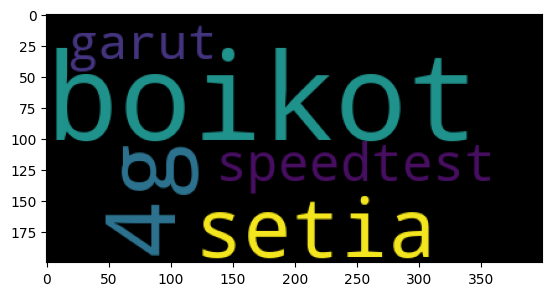

In [21]:
# Create word cloud for positive hashtags
generate_word_cloud(hashtags_positive)

In [22]:
related_hashtags_positive = {}

for hashtag, _ in top_hashtags_positive:
    # Get positve tweets that related to hashtags
    related_hashtags = search_tweet(tweets, keyword=f"#{hashtag}", sentiment="positive")
    related_hashtags = [x[0] for x in related_hashtags]

    # Sort unique hashtags by word length
    related_hashtags = set(related_hashtags)
    related_hashtags = [[x, len(x.split())] for x in related_hashtags]
    related_hashtags = sorted(related_hashtags, key=lambda x: x[1], reverse=True)
    related_hashtags = [x[0] for x in related_hashtags]
    
    related_hashtags_positive.update({f"{hashtag}": related_hashtags})

In [23]:
# Show top 5 of positive tweets that related to hashtags
for hashtag in related_hashtags_positive:
    print(f"Keword: {hashtag}")
    for i in range (5):
        if i < len(related_hashtags_positive[hashtag]):
            print(related_hashtags_positive[hashtag][i])
    print()

Keword: boikot
jauh sebelum ada aksi #Boikot<PROVIDER_NAME> saya tidak pakai <PROVIDER_NAME> lagi,  sebab <PROVIDER_NAME> masih lebih bagus maaf bukan iklan tapi kenyataan
Saya dulu memimpikan pakai <PROVIDER_NAME>.  Tapi sekarang gak mimpi lagi.  Setia saja sama <PROVIDER_NAME> walau mahal sedikit. Ikutan #Boikot<PROVIDER_NAME>
#Boikot <PROVIDER_NAME> harusnya #boikot<PROVIDER_NAME> kartu mahal!. lebih bagus juga <PROVIDER_NAME>
<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>

Keword: 4g
Canggih nih, nambah hari malah nambah kuotanya . #kuota <PROVIDER_NAME> <PRODUCT_NAME> #4g <URL> 
kecepatan internet di ciwidey segini...  mantap <PROVIDER_NAME> #4glte <USER_MENTION> <URL> …
Ini baru #koneksi #internet #4g <PROVIDER_NAME> <URL> 
mantap ini. #4g #LTE <PROVIDER_NAME> <URL>

Keword: setia
Alhamdulillah masih #setia dengan <PROVIDER_NAME>.. jangan menari di tabuhan gendang orang lain.. selamat isya dan tarawih... 
Alhamdulillah masih #setia dengan <PR

## Negative Hashtags

In [24]:
# Get hashtags from all negative tweets
hashtags_negative = [tweet.hashtags for tweet in tweets if tweet.hashtags and tweet.sentiment == "negative"]
hashtags_negative = [" ".join(tweet) for tweet in hashtags_negative]
hashtags_negative = " ".join(hashtags_negative)

# Tokenize hashtags
tokens_hashtags_negative = nltk.word_tokenize(hashtags_negative)
freq_dist = nltk.FreqDist(tokens_hashtags_negative)

# Calculate frequency distribution
top_hashtags_negative = freq_dist.most_common(6)[1:]
top_hashtags_negative

[('boikot', 21), ('lte', 2), ('lemot', 2), ('!', 2), ('ruh212', 2)]

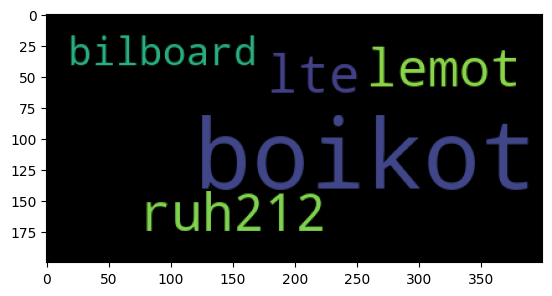

In [25]:
# Create word cloud for positive hashtags
generate_word_cloud(hashtags_negative)

In [26]:
related_hashtags_negative = {}

for hashtag, _ in top_hashtags_negative:
    # Get negative tweets that related to hashtags
    related_hashtags = search_tweet(tweets, keyword=f"#{hashtag}", sentiment="negative")
    related_hashtags = [x[0] for x in related_hashtags]

    # Sort unique tweets by word length
    related_hashtags = set(related_hashtags)
    related_hashtags = [[x, len(x.split())] for x in related_hashtags]
    related_hashtags = sorted(related_hashtags, key=lambda x: x[1], reverse=True)
    related_hashtags = [x[0] for x in related_hashtags]
    
    related_hashtags_negative.update({f"{hashtag}": related_hashtags})

In [27]:
# Show top 10 of negative tweets that related to hashtags
for hashtag in related_hashtags_negative:
    print(f"Keword: {hashtag}")
    for i in range (10):
        if i < len(related_hashtags_negative[hashtag]):
            print(related_hashtags_negative[hashtag][i])
    print()

Keword: boikot
kenapa pada boikot <PROVIDER_NAME> ya #Boikot<PROVIDER_NAME> mungkin karena sering menyedot pulsa ga tau dipake apa, sms 1 bayar 1000 cuma buat bonus maksa
kenapa pada boikot <PROVIDER_NAME> ya #Boikot<PROVIDER_NAME> mungkin karena sering nyedot pulsa ga tau dipake apa, sms 1 bayar 1000 cuma buat bonus maksa
ayo penuhi viralkan keras #Boikot<PROVIDER_NAME>! Nomor sy nomer <PROVIDER_NAME> cantik dr th2007 lgsg sy buang!Jgn main2 dg umat Islam yg brsatu
ayo viralkan keras #Boikot<PROVIDER_NAME>! Nomor saya nomer <PROVIDER_NAME> cantik dari tahun 2007 saya buang! Jangan main2 dengan umat Islam yang brsatu
Saya gak benci tapi kelakuan <USER_MENTION> yang bikin #Boikot<PROVIDER_NAME>  Pendukung #PKI coba kamu lihat iklan <PROVIDER_NAME> ada gambar palu arit
Selama ini saya pake <PROVIDER_NAME>, Insya Allah setelah paket yang sekarang kuotanya habis saya akan ganti operator lain #Boikot<PROVIDER_NAME>
Selama ini saya pakai <PROVIDER_NAME>, Insya Allah setelah paket yang sekara